In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [109]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [110]:
data.shape

(8124, 23)

In [111]:
data.info

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [112]:
print("The Missing values in the dataset are : {}".format(data.isnull().sum()))

The Missing values in the dataset are : class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [113]:
data.describe(include='all').transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [114]:
data = data.drop(["veil-type"], axis = 1) # drop row veil -type

In [115]:
features = data.columns
target = 'class'
features = list(features.drop(target))
features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

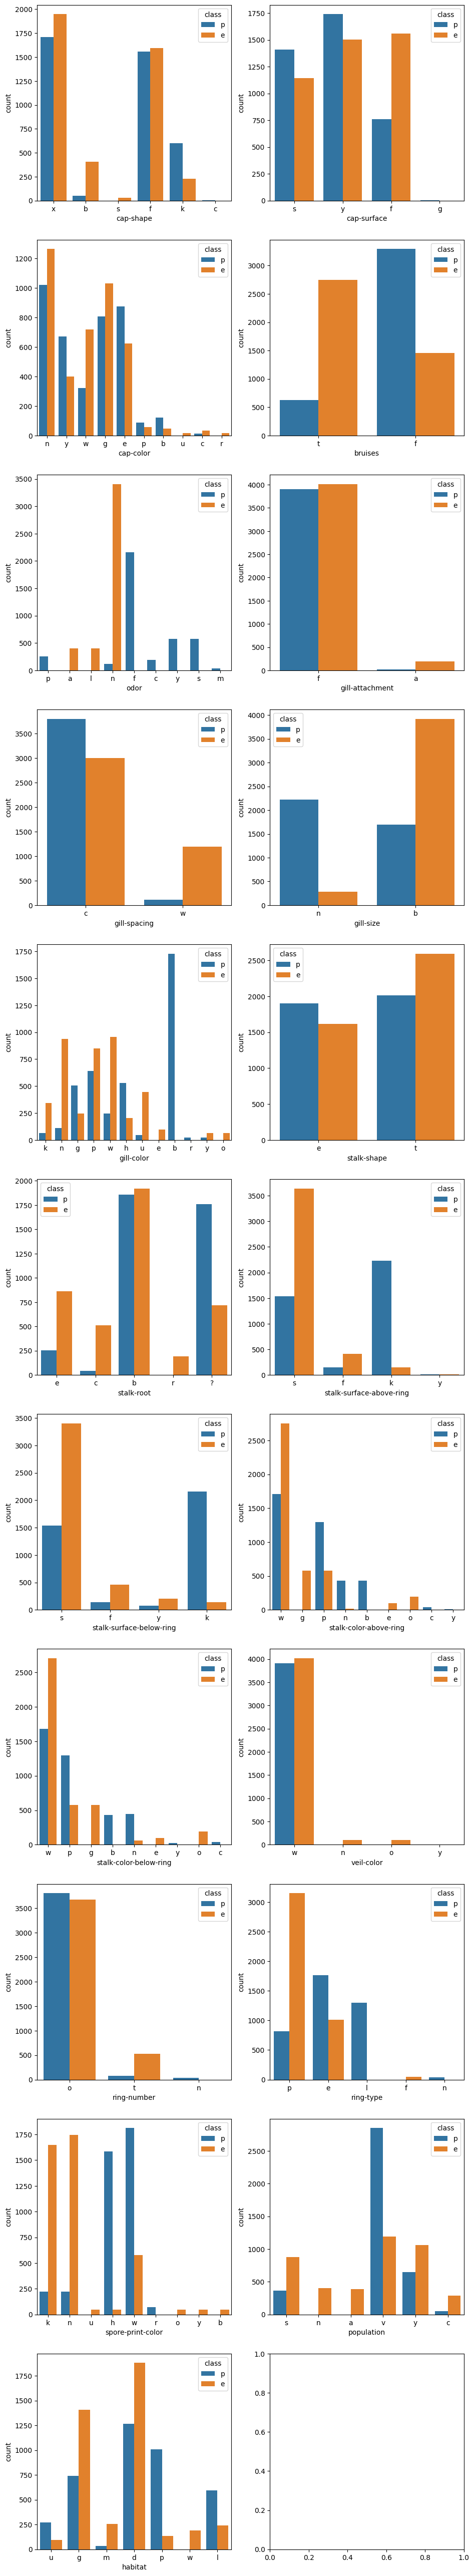

In [116]:
fig, axs = plt.subplots(nrows=11, ncols=2, figsize=(11, 66))

for f, ax in zip(features, axs.ravel()):
    sns.countplot(x=f, hue='class', data=data, ax = ax)

In [117]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [118]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,8124.0,0.482029,0.499708,0.0,0.0,0.0,1.0,1.0
cap-shape,8124.0,3.348104,1.604329,0.0,2.0,3.0,5.0,5.0
cap-surface,8124.0,1.827671,1.229873,0.0,0.0,2.0,3.0,3.0
cap-color,8124.0,4.504677,2.545821,0.0,3.0,4.0,8.0,9.0
bruises,8124.0,0.415559,0.492848,0.0,0.0,0.0,1.0,1.0
odor,8124.0,4.144756,2.103729,0.0,2.0,5.0,5.0,8.0
gill-attachment,8124.0,0.974151,0.158695,0.0,1.0,1.0,1.0,1.0
gill-spacing,8124.0,0.161497,0.368011,0.0,0.0,0.0,0.0,1.0
gill-size,8124.0,0.309207,0.462195,0.0,0.0,0.0,1.0,1.0
gill-color,8124.0,4.810684,3.540359,0.0,2.0,5.0,7.0,11.0


<Axes: >

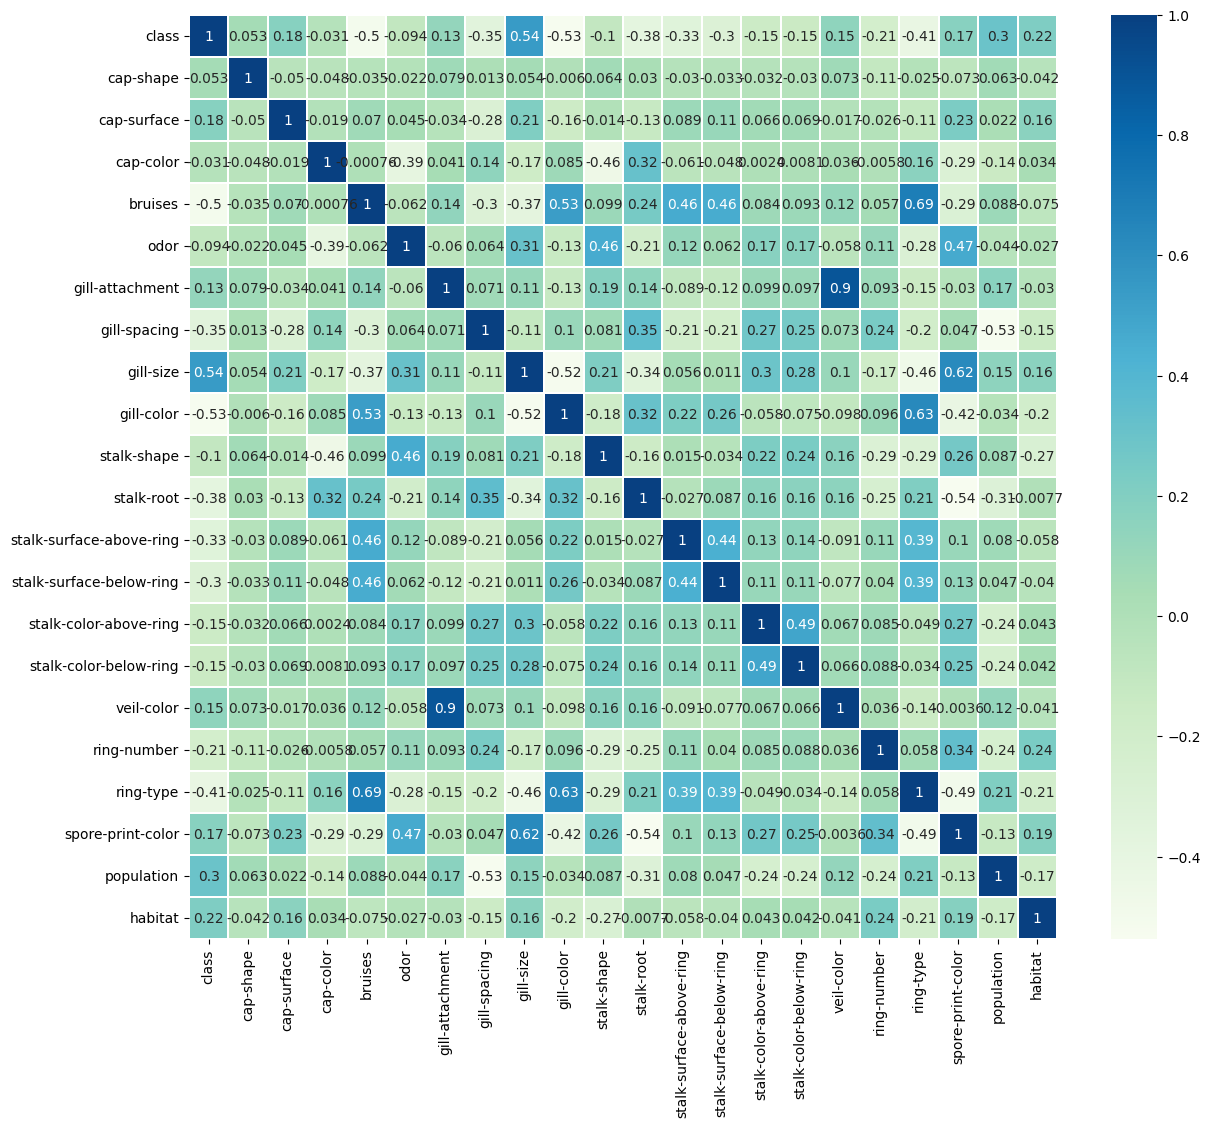

In [119]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="GnBu", annot=True)

In [123]:
X = data.drop('class', axis=1)
y = data['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 21), (2438, 21), (5686,), (2438,))

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [126]:
y_pred = lr.predict(X_test_scaled)

In [127]:
print("Accuracy score is {}".format(lr.score(X_test_scaled, y_test)))

Accuracy score is 0.9532403609515997


In [128]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

#Let's see how our model performed
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1263
           1       0.95      0.95      0.95      1175

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [129]:
print(confusion_matrix(y_test, y_pred))

[[1206   57]
 [  57 1118]]


In [130]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

Normalized confusion matrix


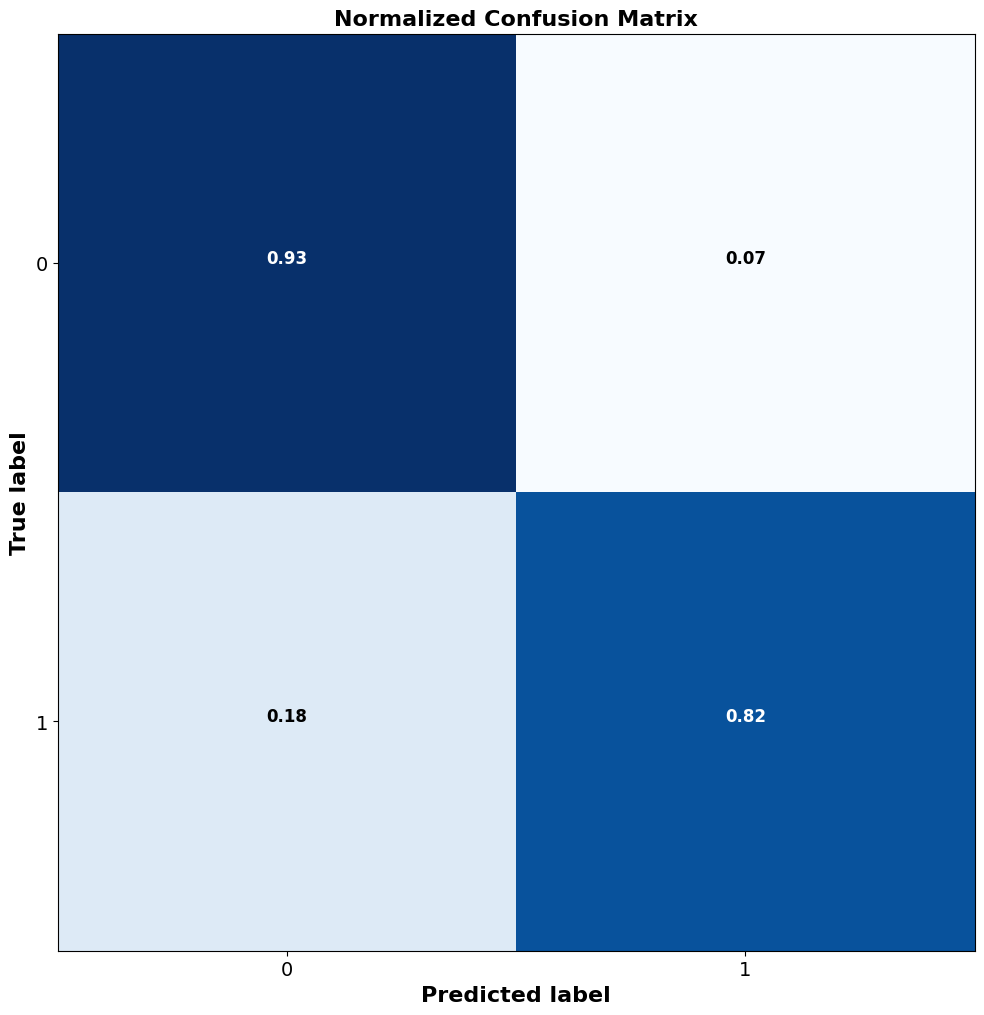

In [107]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=list(ob.classes),normalize=True,
                      title='Normalized Confusion Matrix')
plt.show()

In [131]:
from sklearn.model_selection import cross_val_score

LR_eval = cross_val_score(estimator = lr, X = X_train_scaled, y = y_train, cv = 10)
LR_eval.mean()

0.9526869476967251

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Code logistic regression method without using libary

In [133]:
class logistic_regression:
    
    def __init__(self): 
        self.classes = None
        self.theta=[]
        self.lmd = 0
        self.alpha = 0.1
        self.num_iter = 5000
        
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
  
    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def gradientdescent(self, X, y):
        theta = np.zeros(X.shape[1])
        
        costs = [] 
        
        for i in range(self.num_iter):
            z = np.dot(X, theta)
            h = self.sigmoid(z)
            cost = self.cost(h, y)
            
        gradient = np.dot(X.T, (h - y)) / y.size 
        theta = theta - self.alpha * gradient    
        return theta , costs


    def predict(self, X_test):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)
        pred_test = np.zeros((len(self.classes),len(X_test)))

        for i in range(len(self.classes)):
            pred_test[i,:] = self.sigmoid(np.dot(X_test,self.theta[i])) 
        
        prediction_test = np.argmax(pred_test, axis=0)
        return prediction_test
    
    def train(self,X_train, y_train):
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
    
        self.classes=set(y_train)
        self.t=[]
        
        for clss in self.classes:
            
            ynew = np.array(y_train == clss, dtype = int)
            theta_onevsrest,costs_onevsrest=self.gradientdescent(X_train, ynew)
            self.theta.append(theta_onevsrest)

ob = logistic_regression()
ob.train(X_train_scaled,y_train)
y_pred = ob.predict(X_test_scaled)

In [134]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1263
           1       0.92      0.82      0.86      1175

    accuracy                           0.88      2438
   macro avg       0.88      0.87      0.88      2438
weighted avg       0.88      0.88      0.88      2438



In [135]:
print("Accuracy score is {}".format(lr.score(X_test_scaled, y_test)))

Accuracy score is 0.9532403609515997


In [136]:
print(confusion_matrix(y_test, y_pred))

[[1175   88]
 [ 214  961]]


In [137]:
from sklearn.model_selection import cross_val_score

LR_eval = cross_val_score(estimator = lr, X = X_train_scaled, y = y_train, cv = 10)
LR_eval.mean()

0.9526869476967251

In [138]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

Normalized confusion matrix


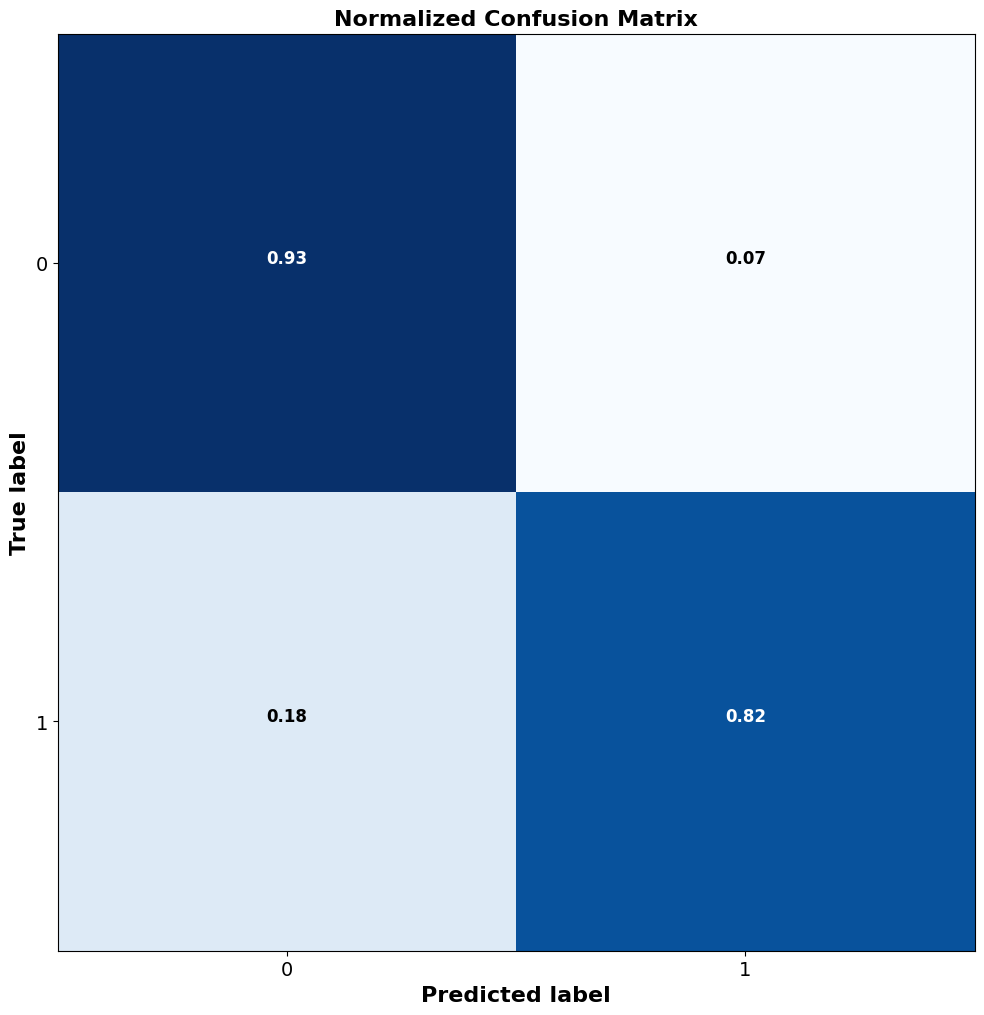

In [105]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=list(ob.classes),normalize=True,
                      title='Normalized Confusion Matrix')
plt.show()